## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
from tensorflow import keras

# from keras.utils import np_utils

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """
    Try to build your own model
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()

model.summary()

SGD = keras.optimizers.SGD(lr=0.001)
model.compile(optimizer = SGD,loss="categorical_crossentropy",metrics=["accuracy"])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


C:\Users\loe_lin\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500,
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 13ms/step - loss: 2.2790 - accuracy: 0.1467 - val_loss: 2.2186 - val_accuracy: 0.1826
Epoch 2/500
196/196 [==============================] - 2s 12ms/step - loss: 2.1807 - accuracy: 0.2153 - val_loss: 2.1492 - val_accuracy: 0.2429
Epoch 3/500
196/196 [==============================] - 3s 15ms/step - loss: 2.1194 - accuracy: 0.2534 - val_loss: 2.0953 - val_accuracy: 0.2625
Epoch 4/500
196/196 [==============================] - 3s 15ms/step - loss: 2.0722 - accuracy: 0.2714 - val_loss: 2.0537 - val_accuracy: 0.2731
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0342 - accuracy: 0.2840 - val_loss: 2.0201 - val_accuracy: 0.2909
Epoch 6/500
196/196 [==============================] - 3s 13ms/step - loss: 2.0037 - accuracy: 0.2974 - val_loss: 1.9929 - val_accuracy: 0.2998
Epoch 7/500
196/196 [==============================] - 2s 12ms/step - loss: 1.9784 - accuracy: 0.3076 - val_loss: 1.9703 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.6569 - accuracy: 0.4240 - val_loss: 1.6669 - val_accuracy: 0.4177
Epoch 58/500
196/196 [==============================] - 3s 13ms/step - loss: 1.6536 - accuracy: 0.4240 - val_loss: 1.6660 - val_accuracy: 0.4155
Epoch 59/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6505 - accuracy: 0.4257 - val_loss: 1.6603 - val_accuracy: 0.4206
Epoch 60/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6474 - accuracy: 0.4272 - val_loss: 1.6555 - val_accuracy: 0.4230
Epoch 61/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6443 - accuracy: 0.4284 - val_loss: 1.6542 - val_accuracy: 0.4254
Epoch 62/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6414 - accuracy: 0.4282 - val_loss: 1.6526 - val_accuracy: 0.4231
Epoch 63/500
196/196 [==============================] - 2s 13ms/step - loss: 1.6384 - accuracy: 0.4307 - val_loss: 1.6486 - val_accuracy: 0.425

196/196 [==============================] - 2s 13ms/step - loss: 1.5239 - accuracy: 0.4687 - val_loss: 1.5502 - val_accuracy: 0.4524
Epoch 114/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5222 - accuracy: 0.4699 - val_loss: 1.5473 - val_accuracy: 0.4541
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5203 - accuracy: 0.4714 - val_loss: 1.5465 - val_accuracy: 0.4567
Epoch 116/500
196/196 [==============================] - 3s 13ms/step - loss: 1.5186 - accuracy: 0.4711 - val_loss: 1.5454 - val_accuracy: 0.4567
Epoch 117/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5168 - accuracy: 0.4712 - val_loss: 1.5461 - val_accuracy: 0.4581
Epoch 118/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5152 - accuracy: 0.4721 - val_loss: 1.5425 - val_accuracy: 0.4585
Epoch 119/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5135 - accuracy: 0.4734 - val_loss: 1.5412 - val_accuracy:

196/196 [==============================] - 2s 13ms/step - loss: 1.4356 - accuracy: 0.5008 - val_loss: 1.4848 - val_accuracy: 0.4745
Epoch 170/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4347 - accuracy: 0.4985 - val_loss: 1.4955 - val_accuracy: 0.4699
Epoch 171/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4330 - accuracy: 0.5012 - val_loss: 1.4818 - val_accuracy: 0.4731
Epoch 172/500
196/196 [==============================] - 3s 13ms/step - loss: 1.4312 - accuracy: 0.5008 - val_loss: 1.4782 - val_accuracy: 0.4726
Epoch 173/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4294 - accuracy: 0.5029 - val_loss: 1.4792 - val_accuracy: 0.4727
Epoch 174/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4281 - accuracy: 0.5025 - val_loss: 1.4787 - val_accuracy: 0.4722
Epoch 175/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4267 - accuracy: 0.5025 - val_loss: 1.4812 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.3593 - accuracy: 0.5267 - val_loss: 1.4343 - val_accuracy: 0.4898
Epoch 226/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3575 - accuracy: 0.5254 - val_loss: 1.4328 - val_accuracy: 0.4897
Epoch 227/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3565 - accuracy: 0.5271 - val_loss: 1.4418 - val_accuracy: 0.4808
Epoch 228/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3552 - accuracy: 0.5280 - val_loss: 1.4361 - val_accuracy: 0.4878
Epoch 229/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3537 - accuracy: 0.5276 - val_loss: 1.4417 - val_accuracy: 0.4843
Epoch 230/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3530 - accuracy: 0.5280 - val_loss: 1.4535 - val_accuracy: 0.4759
Epoch 231/500
196/196 [==============================] - 2s 12ms/step - loss: 1.3517 - accuracy: 0.5296 - val_loss: 1.4376 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.2901 - accuracy: 0.5504 - val_loss: 1.4060 - val_accuracy: 0.4967
Epoch 282/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2895 - accuracy: 0.5504 - val_loss: 1.3945 - val_accuracy: 0.5022ss:
Epoch 283/500
196/196 [==============================] - 2s 12ms/step - loss: 1.2891 - accuracy: 0.5519 - val_loss: 1.4077 - val_accuracy: 0.4953
Epoch 284/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2869 - accuracy: 0.5530 - val_loss: 1.3978 - val_accuracy: 0.4979
Epoch 285/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2864 - accuracy: 0.5526 - val_loss: 1.3998 - val_accuracy: 0.4984
Epoch 286/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2845 - accuracy: 0.5526 - val_loss: 1.3924 - val_accuracy: 0.5018
Epoch 287/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2828 - accuracy: 0.5512 - val_loss: 1.3995 - val_accura

196/196 [==============================] - 2s 10ms/step - loss: 1.2268 - accuracy: 0.5716 - val_loss: 1.3719 - val_accuracy: 0.5091
Epoch 338/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2254 - accuracy: 0.5736 - val_loss: 1.3776 - val_accuracy: 0.5082
Epoch 339/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2257 - accuracy: 0.5724 - val_loss: 1.3751 - val_accuracy: 0.5118
Epoch 340/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2244 - accuracy: 0.5723 - val_loss: 1.3766 - val_accuracy: 0.5031
Epoch 341/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2231 - accuracy: 0.5732 - val_loss: 1.3769 - val_accuracy: 0.5068
Epoch 342/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2212 - accuracy: 0.5743 - val_loss: 1.3882 - val_accuracy: 0.5049
Epoch 343/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2216 - accuracy: 0.5739 - val_loss: 1.3797 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.1664 - accuracy: 0.5941 - val_loss: 1.3944 - val_accuracy: 0.5055
Epoch 394/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1659 - accuracy: 0.5947 - val_loss: 1.3531 - val_accuracy: 0.5192
Epoch 395/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1659 - accuracy: 0.5937 - val_loss: 1.3554 - val_accuracy: 0.5159
Epoch 396/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1641 - accuracy: 0.5937 - val_loss: 1.3602 - val_accuracy: 0.5171
Epoch 397/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1631 - accuracy: 0.5941 - val_loss: 1.3624 - val_accuracy: 0.5100
Epoch 398/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1619 - accuracy: 0.5944 - val_loss: 1.3519 - val_accuracy: 0.5177
Epoch 399/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1620 - accuracy: 0.5950 - val_loss: 1.3647 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.1088 - accuracy: 0.6129 - val_loss: 1.3394 - val_accuracy: 0.5235
Epoch 450/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1089 - accuracy: 0.6148 - val_loss: 1.3423 - val_accuracy: 0.5240
Epoch 451/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1063 - accuracy: 0.6149 - val_loss: 1.3717 - val_accuracy: 0.5177
Epoch 452/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1076 - accuracy: 0.6141 - val_loss: 1.3401 - val_accuracy: 0.5239
Epoch 453/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1056 - accuracy: 0.6158 - val_loss: 1.3785 - val_accuracy: 0.5104
Epoch 454/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1040 - accuracy: 0.6160 - val_loss: 1.3468 - val_accuracy: 0.5263
Epoch 455/500
196/196 [==============================] - 2s 10ms/step - loss: 1.1023 - accuracy: 0.6165 - val_loss: 1.3746 - val_accuracy:

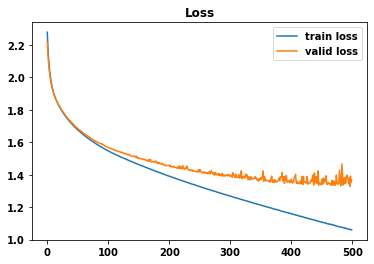

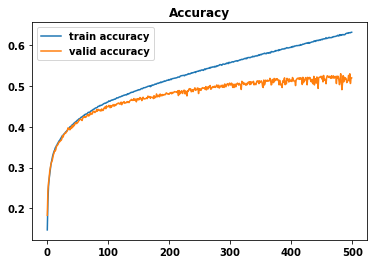

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()